In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn import tree
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
x=df.drop('smoker',axis=1)
x

,age,sex,bmi,children,region,charges
0,19,female,27.900,0,southwest,16884.92400
1,18,male,33.770,1,southeast,1725.55230
2,28,male,33.000,3,southeast,4449.46200
3,33,male,22.705,0,northwest,21984.47061
4,32,male,28.880,0,northwest,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,northwest,10600.54830
1334,18,female,31.920,0,northeast,2205.98080
1335,18,female,36.850,0,southeast,1629.83350
1336,21,female,25.800,0,southwest,2007.94500


In [5]:
y=df['smoker']
y

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [7]:
x['sex']=le.fit_transform(x['sex'])
x['region']=le.fit_transform(x['region'])
x.head()


,age,sex,bmi,children,region,charges
0,19,0,27.900,0,3,16884.92400
1,18,1,33.770,1,2,1725.55230
2,28,1,33.000,3,2,4449.46200
3,33,1,22.705,0,1,21984.47061
4,32,1,28.880,0,1,3866.85520


In [8]:
#y['smoker']=le.fit_transform(y['smoker'])
y.head()

0    yes
1     no
2     no
3     no
4     no
Name: smoker, dtype: object

In [9]:
df['smoker']=le.fit_transform(df['smoker'])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


In [10]:
y1=df['smoker']
y1.head()

0    1
1    0
2    0
3    0
4    0
Name: smoker, dtype: int32

In [11]:
x.head()

,age,sex,bmi,children,region,charges
0,19,0,27.900,0,3,16884.92400
1,18,1,33.770,1,2,1725.55230
2,28,1,33.000,3,2,4449.46200
3,33,1,22.705,0,1,21984.47061
4,32,1,28.880,0,1,3866.85520


In [12]:
from sklearn.model_selection import train_test_split as tts

In [13]:
xtrain,xtest,ytrain,ytest=tts(x,y1,random_state=44,test_size=.30)

In [14]:
xtrain.shape

(936, 6)

In [15]:
xtest.shape

(402, 6)

In [16]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()

In [17]:
clf.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
predict=clf.predict(xtest) #predicted value
predict

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,

In [20]:
np.array(ytest) #actual value

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,

In [21]:
confusion_matrix(ytest,predict) #xtest and ytest

array([[315,  10],
       [  2,  75]], dtype=int64)

In [22]:
tp,fn,fp,tn=confusion_matrix(ytest,predict).reshape(-1)

# Accuracy

In [23]:
accuracy=(tp+tn)/(tp+fn+fp+tn)
accuracy

0.9701492537313433

# Precision or PPV

In [24]:
ppv=tp/(tp+fp)
ppv

0.9936908517350158

# Recall or TPR

In [25]:
tpr=tp/(tp+fn)
tpr

0.9692307692307692

# 1-specificity or FPR

In [26]:
fpr=fp/(fp+tn)
fpr

0.025974025974025976

# F1-measure

In [27]:
F1=(ppv+tpr)/2
F1

0.9814608104828926

# Harmonic Mean or F1 Score

In [28]:
F1_score=(2*ppv*tpr)/(ppv+tpr)
F1_score

0.9813084112149532

# True Negative Rate

In [29]:
TNR=tn/(tn+fp)
TNR

0.974025974025974

# Threat score or Critical Success Index

In [30]:
TS_CSI=tp/(tp+fn+fp)
TS_CSI

0.963302752293578

# False Discovery Rate

In [31]:
FDR=fp/(tp+fp)
FDR

0.006309148264984227

In [32]:
clf.score(xtest,ytest)

0.9701492537313433

In [33]:
cm=confusion_matrix(ytest,predict)

Text(33.0, 0.5, 'Actual Values')

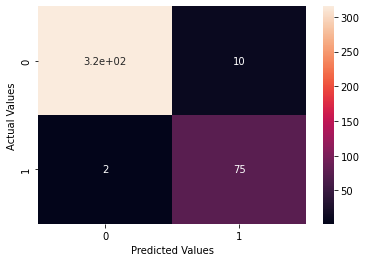

In [34]:
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [35]:
from sklearn.metrics import classification_report,plot_roc_curve,accuracy_score

In [36]:
print(classification_report(ytest,predict))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       325
           1       0.88      0.97      0.93        77

    accuracy                           0.97       402
   macro avg       0.94      0.97      0.95       402
weighted avg       0.97      0.97      0.97       402



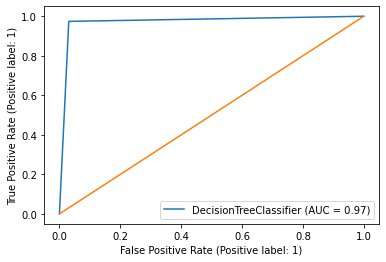

In [37]:
plot_roc_curve(clf,xtest,ytest)
plt.plot([0,1],[0,1])

In [38]:
accuracy_score(ytest,predict)

0.9701492537313433